In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv(r"C:\Users\deepa\Downloads\csv files\winequality-red.csv")

In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.shape

(1599, 12)

In [5]:
#checking the null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.duplicated().sum()

240

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


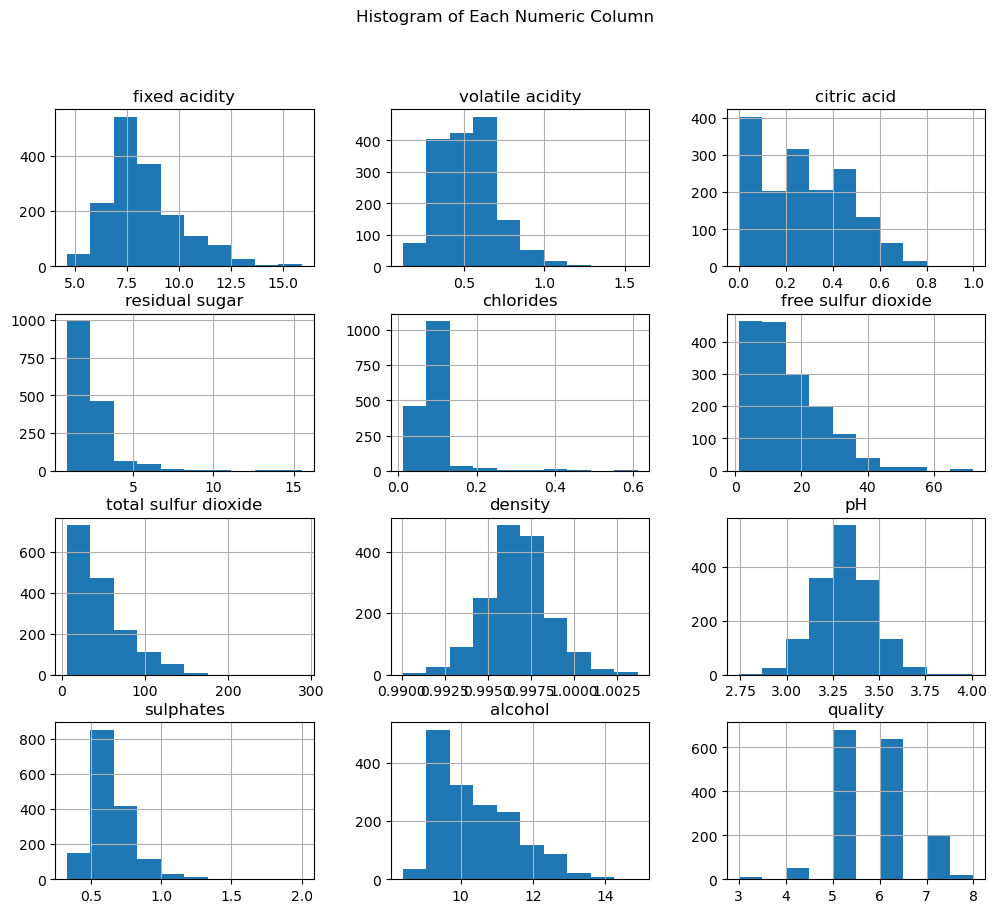

In [10]:
#EDA

data.hist(figsize=(12, 10))
plt.suptitle('Histogram of Each Numeric Column')
plt.show()

<Figure size 1200x1000 with 0 Axes>

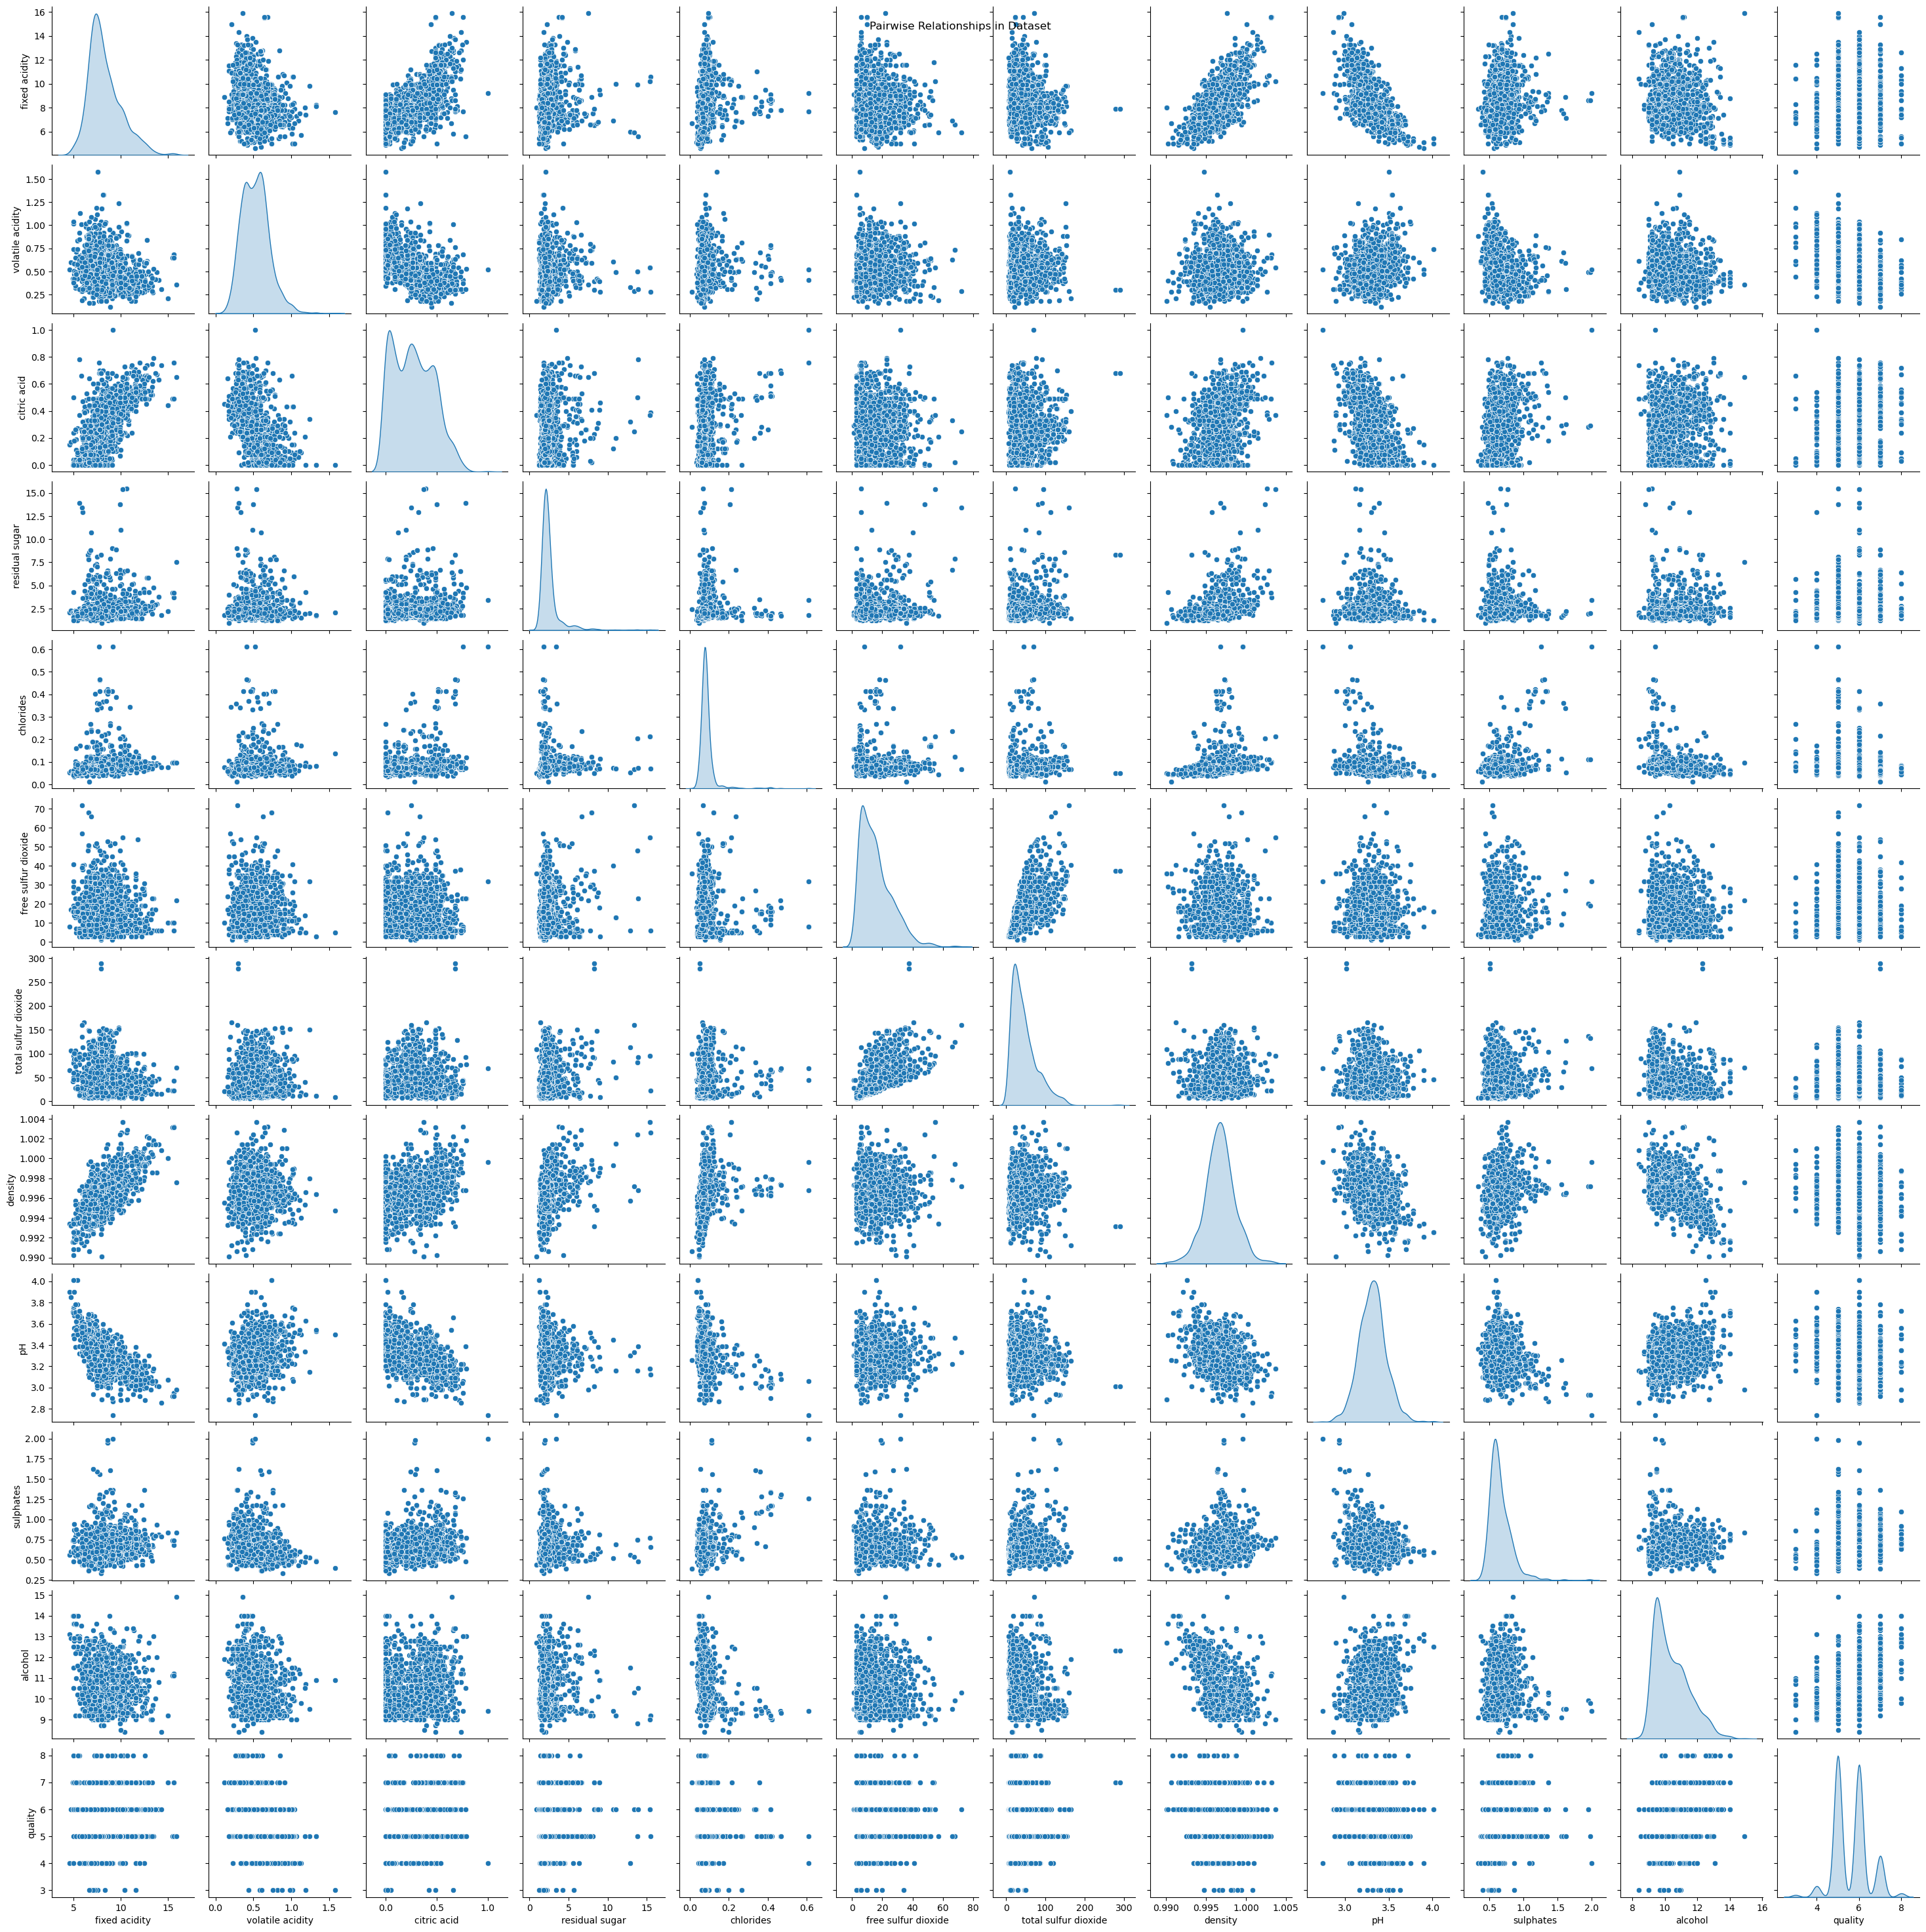

In [12]:
plt.figure(figsize=(12, 10))
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairwise Relationships in Dataset')
plt.show()

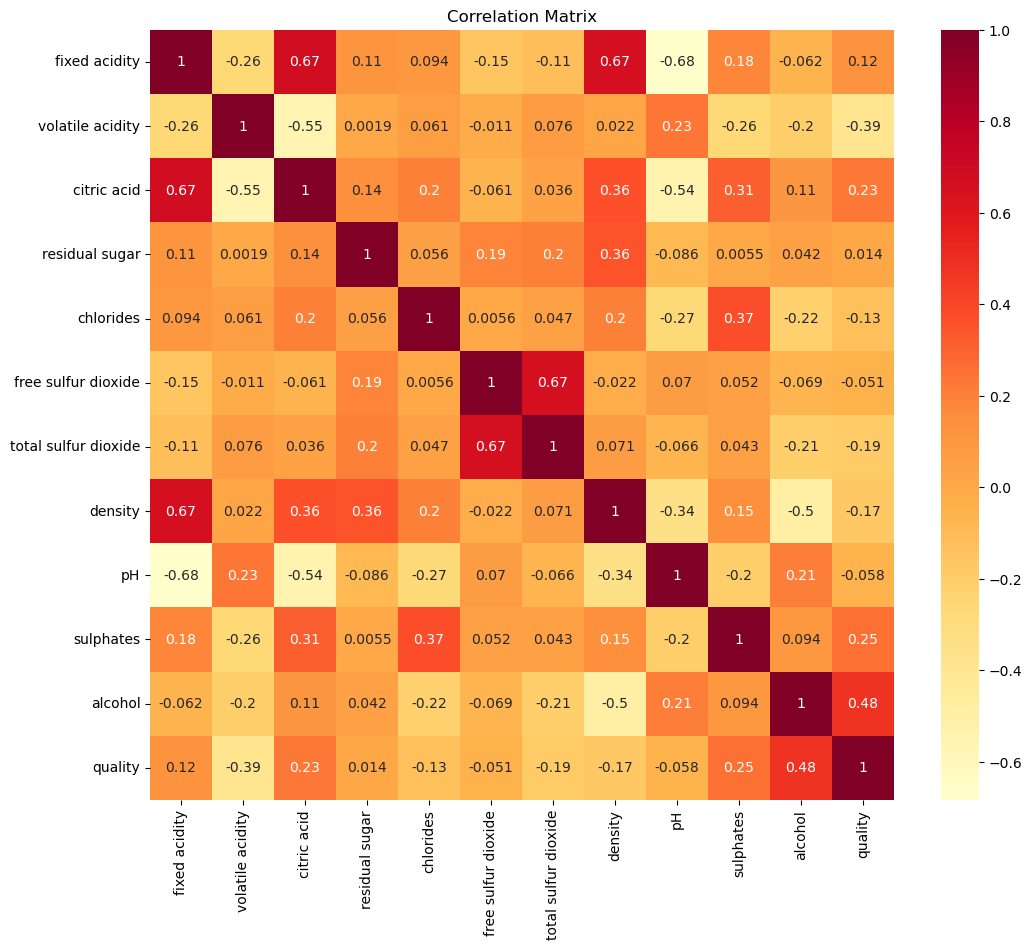

In [13]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

In [14]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [16]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(units=7,activation="sigmoid",use_bias=True))
model.add(Dense(units=10,activation="sigmoid",use_bias=True))
model.add(Dense(units=8,activation="sigmoid",use_bias=True))
model.add(Dense(units=1,activation="linear",use_bias=True))

In [19]:
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=300, batch_size=100)

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 22.3131 - val_accuracy: 0.0000e+00 - val_loss: 5.6231
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.9340 - val_accuracy: 0.0000e+00 - val_loss: 1.1705
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 1.0776 - val_accuracy: 0.0000e+00 - val_loss: 0.6596
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.7071 - val_accuracy: 0.0000e+00 - val_loss: 0.6088
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6317 - val_accuracy: 0.0000e+00 - val_loss: 0.6047
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6601 - val_accuracy: 0.0000e+00 - val_loss: 0.6018
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6610 - val_accuracy: 0.0000e+00 - val_loss: 0.6015
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.6832 - val_accuracy: 0.0000e+00 - val_loss: 0.5972
Epoch 50/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6600 - val_accuracy: 0.0000e+00 - val_loss: 0.5964
Epoch 51/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6778 - val_accuracy: 0.0000e+00 - val_loss: 0.5961
Epoch 52/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6576 - val_accuracy: 0.0000e+00 - val_loss: 0.5969
Epoch 53/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.7046 - val_accuracy: 0.0000e+00 - val_loss: 0.5959
Epoch 54/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6616 - val_accuracy: 0.0000e+00 - val_loss: 0.5957
Epoch 55/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6563 - val_accuracy: 0.0000e+00 - val_loss: 0.5955
Epoch 56/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6839 - val_accuracy: 0.0000e+00 - val_loss: 0.5890
Epoch 98/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6466 - val_accuracy: 0.0000e+00 - val_loss: 0.5889
Epoch 99/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6899 - val_accuracy: 0.0000e+00 - val_loss: 0.5888
Epoch 100/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6637 - val_accuracy: 0.0000e+00 - val_loss: 0.5886
Epoch 101/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6645 - val_accuracy: 0.0000e+00 - val_loss: 0.5885
Epoch 102/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6879 - val_accuracy: 0.0000e+00 - val_loss: 0.5883
Epoch 103/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6040 - val_accuracy: 0.0000e+00 - val_loss: 0.5883
Epoch 104/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6544 - val_accuracy: 0.0000e+00 - val_loss: 0.5818
Epoch 146/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6522 - val_accuracy: 0.0000e+00 - val_loss: 0.5818
Epoch 147/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6133 - val_accuracy: 0.0000e+00 - val_loss: 0.5817
Epoch 148/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6140 - val_accuracy: 0.0000e+00 - val_loss: 0.5814
Epoch 149/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6062 - val_accuracy: 0.0000e+00 - val_loss: 0.5813
Epoch 150/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6184 - val_accuracy: 0.0000e+00 - val_loss: 0.5815
Epoch 151/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6584 - val_accuracy: 0.0000e+00 - val_loss: 0.5810
Epoch 152/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

Epoch 193/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6659 - val_accuracy: 0.0000e+00 - val_loss: 0.5749
Epoch 194/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6413 - val_accuracy: 0.0000e+00 - val_loss: 0.5748
Epoch 195/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6607 - val_accuracy: 0.0000e+00 - val_loss: 0.5750
Epoch 196/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6562 - val_accuracy: 0.0000e+00 - val_loss: 0.5756
Epoch 197/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6477 - val_accuracy: 0.0000e+00 - val_loss: 0.5749
Epoch 198/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6703 - val_accuracy: 0.0000e+00 - val_loss: 0.5743
Epoch 199/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6281 - val_accuracy: 0.0000e+00 - val_loss: 0.5743
Epoch 200/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 241/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6238 - val_accuracy: 0.0000e+00 - val_loss: 0.5690
Epoch 242/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6432 - val_accuracy: 0.0000e+00 - val_loss: 0.5688
Epoch 243/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6515 - val_accuracy: 0.0000e+00 - val_loss: 0.5691
Epoch 244/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6181 - val_accuracy: 0.0000e+00 - val_loss: 0.5690
Epoch 245/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6341 - val_accuracy: 0.0000e+00 - val_loss: 0.5688
Epoch 246/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6077 - val_accuracy: 0.0000e+00 - val_loss: 0.5688
Epoch 247/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6529 - val_accuracy: 0.0000e+00 - val_loss: 0.5684
Epoch 248/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 289/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6224 - val_accuracy: 0.0000e+00 - val_loss: 0.5653
Epoch 290/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6409 - val_accuracy: 0.0000e+00 - val_loss: 0.5645
Epoch 291/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6299 - val_accuracy: 0.0000e+00 - val_loss: 0.5646
Epoch 292/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6172 - val_accuracy: 0.0000e+00 - val_loss: 0.5649
Epoch 293/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.5809 - val_accuracy: 0.0000e+00 - val_loss: 0.5643
Epoch 294/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6447 - val_accuracy: 0.0000e+00 - val_loss: 0.5643
Epoch 295/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6278 - val_accuracy: 0.0000e+00 - val_loss: 0.5642
Epoch 296/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 

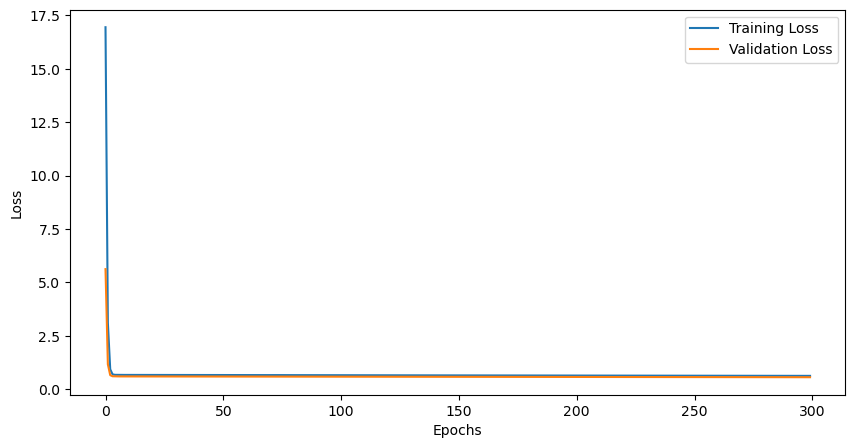

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.6236042622840507

In [23]:
r2_score(y_test, y_pred)

0.04575566792858843